   # GRIPJUN23  Task 1 prediction using supervised ML

   # Author : Mariem Khediri

## Importing required libraries 

In [56]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

## Import the data

In [72]:
URL='http://bit.ly/w-data'
data =pd.read_csv(URL)

## inspect the data

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [59]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


mean and 50% are very close so we have a normal distribution

## data visualization

[Text(0.5, 1.0, 'Data distribution'),
 Text(0.5, 0, 'Columns'),
 Text(0, 0.5, 'Values')]

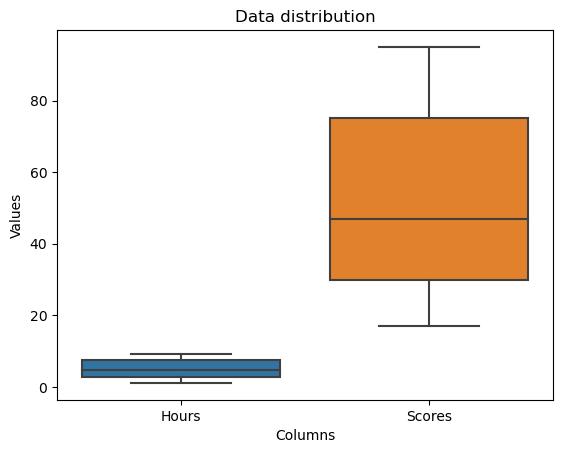

In [60]:
sns.boxplot(data = df).set(title = 'Data distribution' , xlabel = 'Columns' , ylabel ='Values') 

[Text(0.5, 1.0, 'Correlation')]

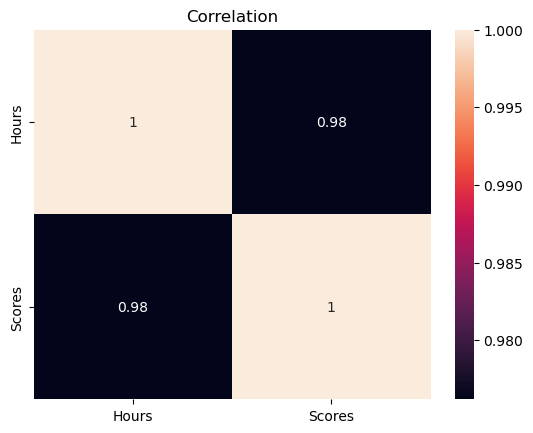

In [61]:
sns.heatmap(df.corr() , annot = True).set(title = 'Correlation')

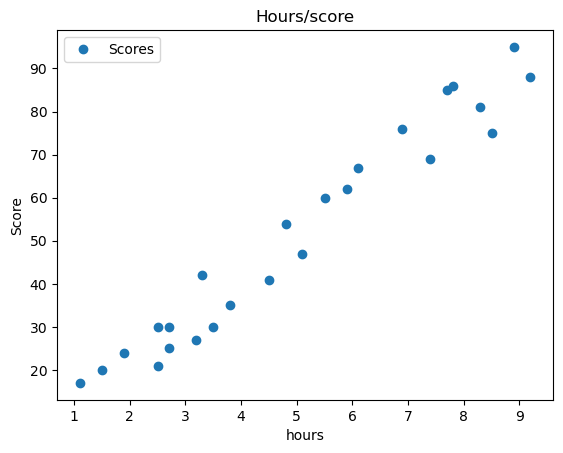

In [62]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours/score')  
plt.xlabel('hours')  
plt.ylabel('Score')  
plt.show()

## Linear Regression Model

In [77]:
#Splitting training and testing data
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

x_train, x_test, y_train, y_test= train_test_split(x, y,train_size=0.80,test_size=0.20,random_state=0)

### Training the model

In [79]:
linearRegressor= LinearRegression()
linearRegressor.fit(x_train.reshape(-1,1), y_train)

y_predict= linearRegressor.predict(x_train)

In [80]:
regressor = LinearRegression()  
regressor.fit(x_train.reshape(-1,1), y_train) 

print("Training complete")

Training complete


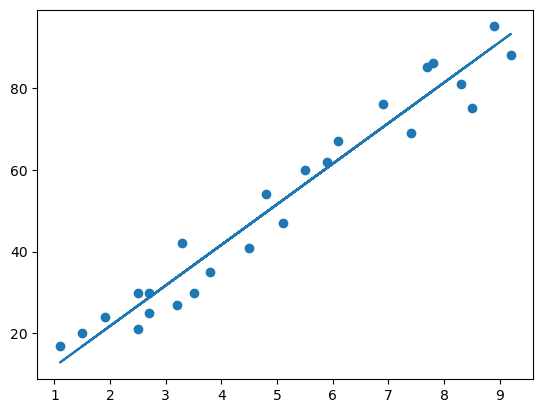

In [81]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

## Checking the accuracy

In [82]:
print('Testing Score')
print(regressor.score(x_test, y_test))
print('Training Score')
print(regressor.score(x_train, y_train))

Testing Score
0.9454906892105356
Training Score
0.9515510725211552


## Model Evaluation

In [71]:
#Checking the efficiency of model
mean_squ_error = mean_squared_error(y_test, y_predict)
mean_abs_error = mean_absolute_error(y_test, y_predict)
print("Mean Squred Error:",mean_squ_error)
print("Mean absolute Error:",mean_abs_error)

Mean Squred Error: 21.5987693072174
Mean absolute Error: 4.183859899002975


## predictions

In [68]:
print(x_test)
#Prediction of test set
y_predict= linearRegressor.predict(x_test)


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [69]:
data= pd.DataFrame({'Actual': y_test,'Predicted': y_predict})
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [70]:
#Let's predict the score for 9.25 hpurs
print('Score of student who studied for 9.25 hours a day', regressor.predict([[9.25]]))

Score of student who studied for 9.25 hours a day [93.69173249]


## prediction = 93.69173249